Name: Md Abdul Kadir

Linear Model


In [102]:
#Imports
import pandas as pd
import numpy as np

In [103]:
# Importan Methodes
# Replace the nan vale with mean, median, or most frequent value
def replaceNaN(dataframe, replaceby = "mean"):
    if (replaceby == "mean"):
        return dataframe.fillna(dataframe.mean())
    
    elif (replaceby == "median"):
        return dataframe.fillna(dataframe.median())
    
    elif (replaceby == "mostfrq"):
        return dataframe.fillna(dataframe.mode().iloc[0])
    
    else:return dataframe.dropna()
    
# Replce any nonnumaric char from a column.    
def replce_char(dataframe,collumn, char=r'^<'):
    dataframe[collumn] =  dataframe[collumn].replace(regex=char, value='')
    dataframe[collumn] = pd.to_numeric(dataframe[collumn],errors='coerce')
    return dataframe
    
    
    
# Scale the data using standard scaler or max min scaler. Menstion the names to scale. 
def scale(dataframe, coulumns, scaler="ss"):
    if (scaler == "mm"):
        from sklearn.preprocessing import MinMaxScaler
        scaler = MinMaxScaler()
        dataframe[coulumns] = scaler.fit_transform(dataframe[coulumns])
        return dataframe
    elif (scaler == "ss"):
        from sklearn.preprocessing import StandardScaler
        scaler = StandardScaler()
        datqframe[coulumns] = scaler.fit_transform(dataframe[coulumns])
        return dataframe
    
    else:return dataframe
        
    

    

In [104]:
#Load Dtasets

# Load Protein Supply Data

Protein_Supply_DF = pd.read_csv("../Data/Protein_Supply_Quantity_Data.csv")
Protein_Supply_DF = replaceNaN(Protein_Supply_DF, replaceby="mostfrq")



In [105]:
##Standard Scaler 
NOT_IPMORTANT_COLUMNS = ["Country", 'Unit (all except Population)', 'Population']

clm = Protein_Supply_DF.columns.drop(NOT_IPMORTANT_COLUMNS)

Protein_Supply_DF = replce_char(Protein_Supply_DF,"Undernourished", char=r'^<')
scaled_df = scale(Protein_Supply_DF, clm, scaler="mm")


In [133]:
# Randomise data
scaled_df = scaled_df.sample(frac=1,random_state=1).reset_index(drop=True)
scaled_df

,Country,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Vegetables,Miscellaneous,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
0,Greece,0.173939,0.718949,0.101764,0.0,0.239089,0.348646,0.146262,0.204562,0.482208,...,0.440805,0.188666,0.581609,0.000000,0.036756,0.020087,0.020417,0.033908,10701000.0,%
1,Oman,0.021523,0.648885,0.029979,0.0,0.306624,0.388807,0.250069,0.515565,0.409767,...,0.512992,0.123976,0.478161,0.075306,0.474853,0.019076,0.116882,0.715318,4695000.0,%
2,Tunisia,0.048097,0.312500,0.092689,0.0,0.615425,0.309845,0.095408,0.167614,0.211699,...,0.754697,0.034119,0.579310,0.031524,0.012064,0.005016,0.013386,0.001207,11665000.0,%
3,Hungary,0.387189,0.761918,0.579892,0.0,0.278409,0.669225,0.053863,0.078797,0.653231,...,0.342185,0.014441,0.609195,0.000000,0.053955,0.066736,0.037093,0.030447,9770000.0,%
4,Kenya,0.126208,0.261137,0.041909,0.0,0.585388,0.076272,0.047007,0.123086,0.202445,...,0.178187,0.006925,0.089655,0.471103,0.006705,0.001908,0.002274,0.009236,52574000.0,%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,Fiji,0.163397,0.531495,0.248292,0.0,0.320402,0.225416,0.347815,0.053417,0.443226,...,0.273597,0.068575,0.641379,0.021016,0.002418,0.000000,0.003209,0.000000,892000.0,%
166,Philippines,0.140117,0.512380,0.325380,0.0,0.549146,0.277104,0.364834,0.265168,0.419773,...,0.372728,0.047124,0.089655,0.189142,0.026509,0.011078,0.006663,0.038054,108117000.0,%
167,Yemen,0.000000,0.177342,0.019170,0.0,0.969498,0.110258,0.048545,0.093523,0.239112,...,0.078033,0.047631,0.275862,0.637478,0.001944,0.004586,0.000125,0.003009,29162000.0,%
168,Guatemala,0.057613,0.349471,0.036505,0.0,0.561035,0.729608,0.027390,0.130536,0.373861,...,0.208014,0.078541,0.383908,0.222417,0.052773,0.017117,0.011405,0.079265,17581000.0,%


# A simple regression model for 1 variable.

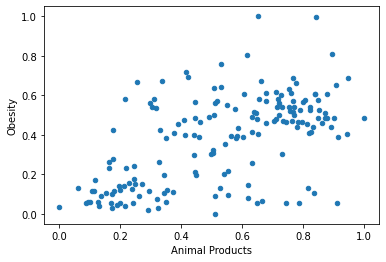

In [145]:
# Chosse training input and output
XY = scaled_df[['Animal Products','Obesity' ]]
XY.plot.scatter(x = 'Animal Products', y ='Obesity')


In [146]:
# Devide trian and test set
msk = np.random.rand(len(XY)) < 0.8
train = XY[msk]
test = XY[~msk]


In [147]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold 
X = pd.DataFrame(XY['Animal Products'])
y = pd.DataFrame(XY['Obesity'])
model = LinearRegression()
scores = []
kfold = KFold(n_splits=3, shuffle=True, random_state=1)
for i, (train, test) in enumerate(kfold.split(X, y)):
    model.fit(X.iloc[train,:], y.iloc[train,:])
    score = model.score(X.iloc[test,:], y.iloc[test,:])
    scores.append(score)
print(scores)

[0.4133678784293833, 0.21235084616155286, 0.21376052399013623]
